In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
data = load_breast_cancer()
X = data.data  
y = data.target 

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) 
# n_init = 10
y_kmeans = kmeans.fit_predict(X_scaled)

In [40]:
print("Confusion Matrix:")
print(confusion_matrix(y, y_kmeans))

Confusion Matrix:
[[ 36 176]
 [339  18]]


In [41]:
print("\nClassification Report:")
print(classification_report(y, y_kmeans))


Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.17      0.12       212
           1       0.09      0.05      0.07       357

    accuracy                           0.09       569
   macro avg       0.09      0.11      0.09       569
weighted avg       0.09      0.09      0.09       569



In [42]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [43]:
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Cluster'] = y_kmeans 
df['True Label'] = y  

In [44]:
df

,PC1,PC2,Cluster,True Label
0,9.192837,1.948583,1,0
1,2.387802,-3.768172,1,0
2,5.733896,-1.075174,1,0
3,7.122953,10.275589,1,0
4,3.935302,-1.948072,1,0
...,...,...,...,...
564,6.439315,-3.576817,1,0
565,3.793382,-3.584048,1,0
566,1.256179,-1.902297,1,0
567,10.374794,1.672010,1,0


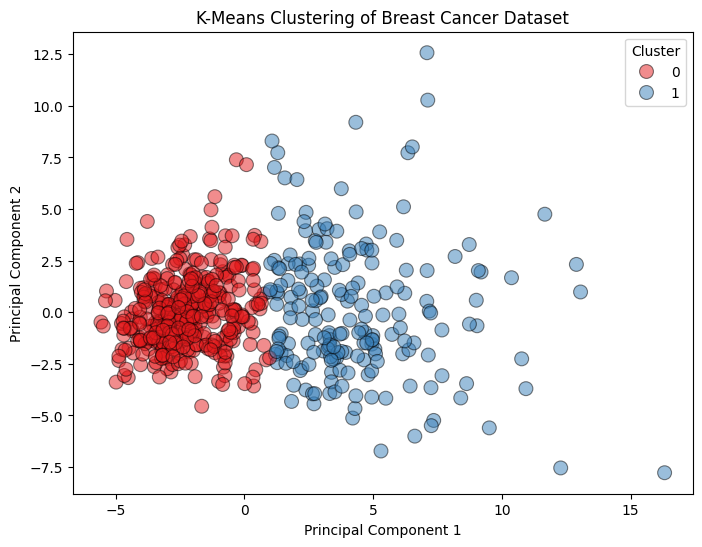

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100,
                edgecolor='black', alpha=0.5)
plt.title('K-Means Clustering of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.show()

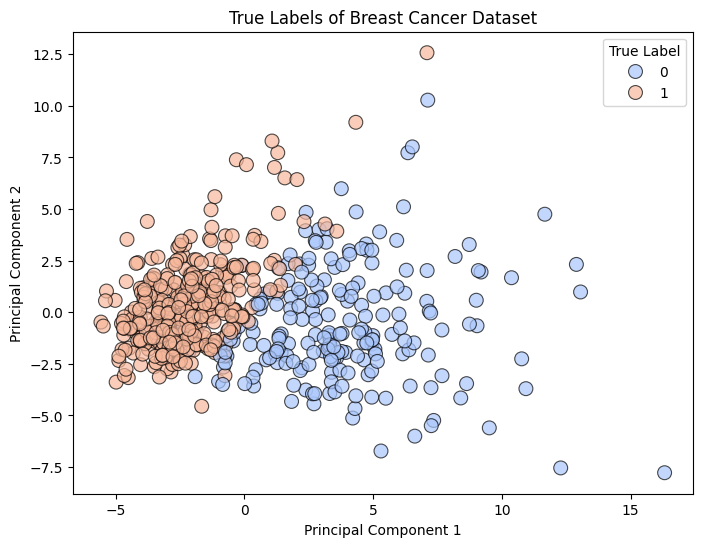

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='True Label', palette='coolwarm', s=100,
                edgecolor='black', alpha=0.7)
plt.title('True Labels of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="True Label")
plt.show()

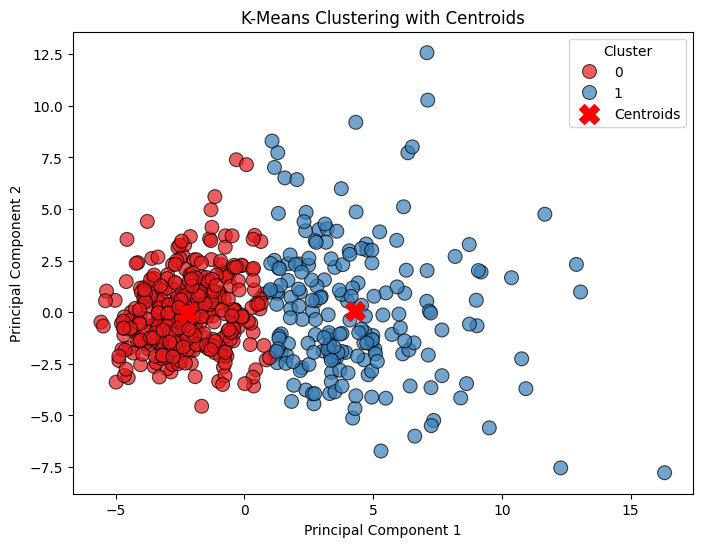

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100,
                edgecolor='black', alpha=0.7)
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=200,
            c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.show()